In [4]:
import numpy as np
import matplotlib.pyplot as plt

from MyFunc import *
from MyNet import Net

In [5]:
def sin_data(n):
    X = np.linspace(-np.pi, np.pi, n)
    Y = np.sin(X)
    return X.reshape(-1, 1), Y.reshape(-1, 1)

def sin_shuffle(X, Y):
    idx = np.random.permutation(len(X))
    return X[idx], Y[idx]

def sin_sort(X, Y, Y_):
    idx = np.argsort(X, axis=0)
    return X[idx].reshape(-1), Y[idx].reshape(-1), Y_[idx].reshape(-1)

epoch: 0, loss: 0.500
epoch: 1, loss: 0.503
epoch: 2, loss: 0.500
epoch: 3, loss: 0.506
epoch: 4, loss: 0.500
epoch: 5, loss: 0.501
epoch: 6, loss: 0.503
epoch: 7, loss: 0.498
epoch: 8, loss: 0.291
epoch: 9, loss: 0.196
epoch: 10, loss: 0.079
epoch: 11, loss: 0.047
epoch: 12, loss: 0.036
epoch: 13, loss: 0.027
epoch: 14, loss: 0.021
epoch: 15, loss: 0.016
epoch: 16, loss: 0.013
epoch: 17, loss: 0.011
epoch: 18, loss: 0.009
epoch: 19, loss: 0.008
epoch: 20, loss: 0.006
epoch: 21, loss: 0.006
epoch: 22, loss: 0.004
epoch: 23, loss: 0.004
epoch: 24, loss: 0.004
epoch: 25, loss: 0.005
epoch: 26, loss: 0.005
epoch: 27, loss: 0.003
epoch: 28, loss: 0.002
epoch: 29, loss: 0.008
epoch: 30, loss: 0.032
epoch: 31, loss: 0.005
epoch: 32, loss: 0.002
epoch: 33, loss: 0.003
epoch: 34, loss: 0.002
epoch: 35, loss: 0.002
epoch: 36, loss: 0.003
epoch: 37, loss: 0.002
epoch: 38, loss: 0.005
epoch: 39, loss: 0.002
epoch: 40, loss: 0.002
epoch: 41, loss: 0.002
epoch: 42, loss: 0.001
epoch: 43, loss: 0.00

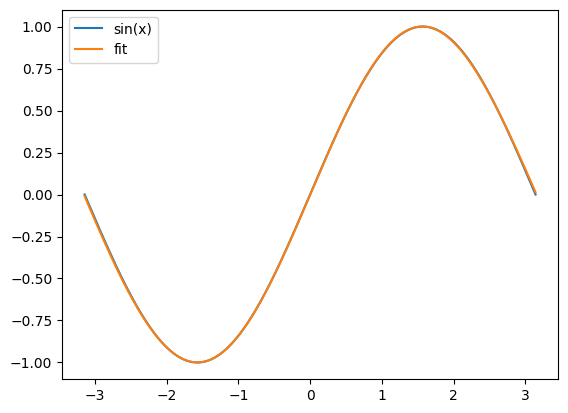

In [6]:
net_info = [
    {"in_features": 1, "out_features": 4, "activation": Gelu},
    {"in_features": 4, "out_features": 4, "activation": Gelu},
    {"in_features": 4, "out_features": 1, "activation": Id},
]

net = Net(net_info)
X, Y = sin_data(1000)

epochs = 200
for i in range(epochs):
    X, Y = sin_shuffle(X, Y)
    net.train(X, Y, Mse, 10, 1)

    _Y = net.pred(X)
    loss = Mse.forward(Y, _Y)
    print(f"epoch: {i}, loss: {loss:.3f}")


X, Y, _Y = sin_sort(X, Y, _Y)
plt.plot(X, Y, label="sin(x)")
plt.plot(X, _Y, label="fit")
plt.legend()
plt.show()